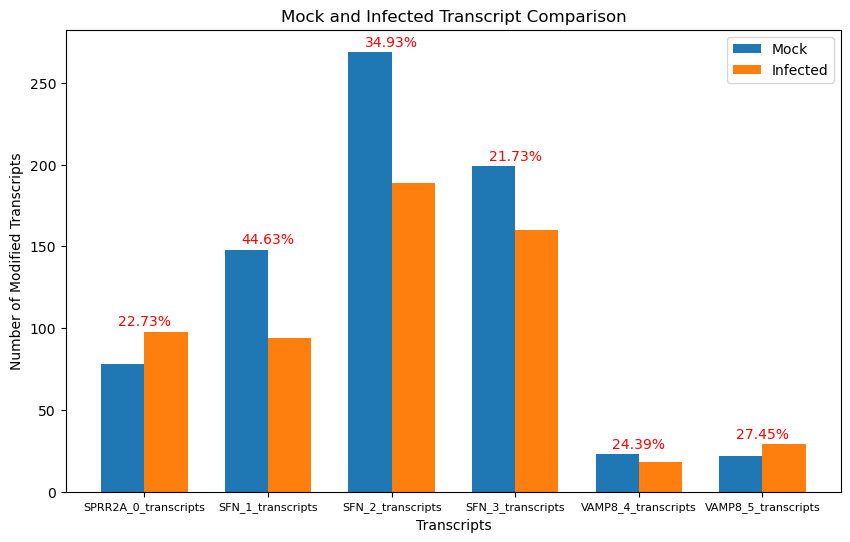

In [31]:
"""Use data from genes of interest to perform analysis and generate necessary figures."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Test data for debugging purposes
mock_analysis = pd.DataFrame({
    'gene': ['SPRR2A', 'SFN', 'SFN', 'SFN', 'VAMP8', 'VAMP8'],
    'n_reads': [95, 242, 340, 320, 25, 30],
    'probability_modified': [0.995655, 0.944194, 0.970435, 0.950189, 0.976895, 0.961319],
    'kmer': ['AGACT', 'GAACT', 'GGACT', 'GGACA', 'GGACT', 'GGACT'],
    'mod_ratio': [0.821053, 0.611570, 0.791176, 0.621875, 0.920000, 0.733333]
})

inf_analysis = pd.DataFrame({
    'gene': ['SPRR2A', 'SFN', 'SFN', 'SFN', 'VAMP8', 'VAMP8'],
    'n_reads': [126, 159, 233, 233, 24, 37],
    'probability_modified': [0.987176, 0.941530, 0.980435, 0.969402, 0.913177, 0.954685],
    'kmer': ['AGACT', 'GAACT', 'GGACT', 'GGACA', 'GGACT', 'GGACT'],
    'mod_ratio': [0.777778, 0.591195, 0.811159, 0.686695, 0.750000, 0.783784]
})

# Define a function to calculate number of modified transcripts
def calcModTran(data):
    modified_transcripts = {}
    for index, row in data.iterrows():
        # Extract values from the n_reads and mod_ratio columns
        total_reads = row['n_reads']
        ratio_of_modified = row['mod_ratio']
        
        # Perform the multiplication
        modified_reads = total_reads * ratio_of_modified
        
        # Store the result in the dictionary with a unique key
        key = f"{row['gene']}_{index}_mock"  # Use index to create a unique key
        modified_transcripts[key] = modified_reads

    return modified_transcripts

mock_values = calcModTran(mock_analysis)
inf_values = calcModTran(inf_analysis)

# Extract keys from dictionaries
mock_keys = list(mock_values.keys())
inf_keys = list(inf_values.keys())

# Initialize a dictionary to store percentage differences
percentage_differences = {}

# Calculate percentage differences
for i in range(min(len(mock_keys), len(inf_keys))):
    mock_value = mock_values[mock_keys[i]]
    inf_value = inf_values[inf_keys[i]]

    # Calculate percentage difference using the correct formula
    percentage_diff = abs((inf_value - mock_value) / ((inf_value + mock_value) / 2)) * 100

    # Modify the key to end with "_difference"
    new_key = mock_keys[i].replace("_mock", "_difference")
    percentage_differences[new_key] = percentage_diff

# Extract data for plotting
keys = list(mock_values.keys())
index = np.arange(len(keys))

# Ensure that mock and infected pairs are next to each other
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Bar graph for mock and infected values
bar1 = ax.bar(index, list(mock_values.values()), bar_width, label='Mock')
bar2 = ax.bar(index + bar_width, (inf_values.values()), bar_width, label='Infected')

# Annotate with percentage differences
for i, (mock_val, inf_val, diff) in enumerate(zip(list(mock_values.values()), list(inf_values.values()), list(percentage_differences.values()))):
    max_val = max(mock_val, inf_val)
    ax.annotate(f'{diff:.2f}%', (index[i] + bar_width / 2, max_val + 6), ha='center', va='center', color='red')

# Set labels and title
ax.set_xlabel('Transcripts')
ax.set_ylabel('Number of Modified Transcripts')
ax.set_title('Mock and Infected Transcript Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(keys)
ax.legend()

# Replace "_mock" with "_transcripts" in the keys for xticklabels
xticklabels = [key.replace("_mock", "_transcripts") for key in keys]

# Set xticklabels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(xticklabels)

# Set xticklabels font size
ax.tick_params(axis='x', labelsize=8) 

# Display the graph
plt.show()